# WEEK1 HW: Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 불러오기

In [2]:
bike = pd.read_csv('C:/Users/kwon/ESC/day.csv')
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### 데이터 들여다보기

In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
Data = bike[['cnt', 'temp']]
Data.describe()

,cnt,temp
count,731.000000,731.000000
mean,4504.348837,0.495385
std,1937.211452,0.183051
min,22.000000,0.059130
25%,3152.000000,0.337083
50%,4548.000000,0.498333
75%,5956.000000,0.655417
max,8714.000000,0.861667


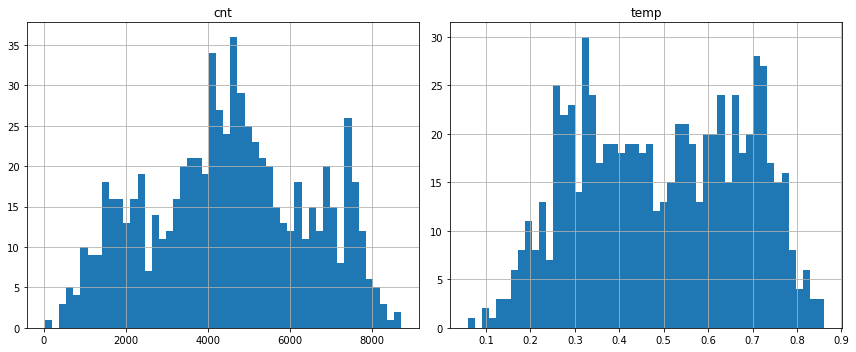

In [5]:
Data.hist(bins=50, figsize=(12, 5))
plt.tight_layout()

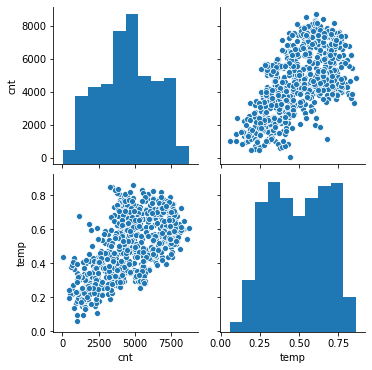

In [6]:
sns.pairplot(Data)

### Polynomial Regression

In [7]:
data = Data.sample(n=30).reset_index()
data

,index,cnt,temp
0,691,2425,0.340000
1,698,5323,0.280870
2,526,6598,0.726667
3,712,5532,0.295833
4,502,7384,0.593333
5,68,623,0.389091
6,625,6869,0.580833
7,582,5464,0.769167
8,141,4660,0.604167
9,241,5204,0.639167


### 1) Train-Test Split

In [8]:
N = data.shape[0]
test = np.random.choice(np.arange(N), 20, replace=False)
train_df = data[~data.index.isin(test)].copy()
test_df = data[data.index.isin(test)].copy()
print(train_df.shape, test_df.shape)

(10, 3) (20, 3)


In [9]:
y = np.matrix(data['cnt']).T
X = np.matrix(data['temp']).T
y_train = np.matrix(train_df['cnt']).T
X_train = np.matrix(train_df['temp']).T
y_test = np.matrix(test_df['cnt']).T
X_test = np.matrix(test_df['temp']).T

### 3) Linear Regression Fitting

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

for i in range(2, 13):
    poly_i = PolynomialFeatures(degree=i)
    X_train_poly_i = poly_i.fit_transform(X_train)
    X_test_poly_i = poly_i.fit_transform(X_test)
    lin_i = LinearRegression(fit_intercept=False)
    lin_i.fit(X_train_poly_i, y_train)
    train_MSE_i = np.log((y_train-np.matrix(X_train_poly_i)*np.matrix(lin_i.coef_).T).T*(y_train-np.matrix(X_train_poly_i)*np.matrix(lin_i.coef_).T)/y_train.size)
    test_MSE_i = np.log((y_test-np.matrix(X_test_poly_i)*np.matrix(lin_i.coef_).T).T*(y_test-np.matrix(X_test_poly_i)*np.matrix(lin_i.coef_).T)/y_test.size)
    print('train / test MSE with degree =', i,':', train_MSE_i, '/', test_MSE_i)

train / test MSE with degree = 2 : [[13.80373307]] / [[14.94969896]]
train / test MSE with degree = 3 : [[13.80366816]] / [[14.94331158]]
train / test MSE with degree = 4 : [[13.73659617]] / [[15.29254948]]
train / test MSE with degree = 5 : [[13.72614312]] / [[15.43012693]]
train / test MSE with degree = 6 : [[13.59573105]] / [[22.37196168]]
train / test MSE with degree = 7 : [[12.69293282]] / [[28.61944015]]
train / test MSE with degree = 8 : [[12.52133757]] / [[30.0426693]]
train / test MSE with degree = 9 : [[-12.73277083]] / [[38.96189752]]
train / test MSE with degree = 10 : [[-13.90956419]] / [[38.09894528]]
train / test MSE with degree = 11 : [[-16.57755367]] / [[37.29674539]]
train / test MSE with degree = 12 : [[-18.31981561]] / [[36.55124622]]


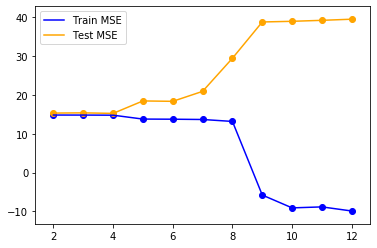

In [11]:
train_MSE = [14.79447692,14.78583107,14.75696578,13.75716377,13.72359037,13.6500718,13.15081675,-5.78233475,-9.08566005,-8.83062837,-9.88815123]
test_MSE = [15.29869371,15.35700987,15.21927772,18.42328617,18.32036266,20.88563801,29.404016,38.7340647,38.90383641,39.15599948,39.44638309]
x = range(2,13)
plt.plot(x, train_MSE, color='blue')
plt.plot(x, test_MSE, color='orange')
plt.scatter(x, train_MSE, color='blue')
plt.scatter(x, test_MSE, color='orange')
plt.legend(['Train MSE', 'Test MSE'])